<a href="https://colab.research.google.com/github/KarolineCostadaSilva/curso_fotografia_computacional/blob/main/Semana%203/02_Atividade_pratica_Fotografia_com_pouca_luz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fotografia com pouca luz

Tutorial Google Colab: https://colab.research.google.com/?utm_source=scs-index

## Importando imagens de teste

Neste repositório do Github você encontrará 100 fotografias de uma figura colocada em uma cena com iluminação muito fraca e quase sem iluminação. Estas foram tiradas de um iPhoneX. Além disso, foi utilizado o aplicativo “Manual Cam”, disponível na AppStore e que permite a configuração manual da câmera quanto à exposição, ISO e abertura. Assim, podemos simular o exemplo que vimos anteriormente com as nossas imagens.

Sugestão para telefones Android: DSLR de câmera manual (Lite)

In [ ]:
!git clone https://github.com/kevinruiz182/iqa_img_storage.git

Cloning into 'iqa_img_storage'...
remote: Enumerating objects: 506, done.
remote: Counting objects: 100% (506/506), done.
remote: Compressing objects: 100% (411/411), done.
remote: Total 506 (delta 96), reused 500 (delta 93), pack-reused 0
Receiving objects: 100% (506/506), 32.37 MiB | 36.27 MiB/s, done.
Resolving deltas: 100% (96/96), done.


## Lendo as imagens


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def open_rgb_img(img_src):
  im_cv = cv2.imread(img_src, cv2.IMREAD_UNCHANGED)
  return cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)

No momento em que queremos tirar uma fotografia de uma cena com pouca luz, mas a câmera possui uma abertura (lente) pequena e tempo de exposição limitado. Esta é uma situação típica para câmeras de celulares que, em uma cena com pouca luz, poderiam produzir uma imagem como esta:

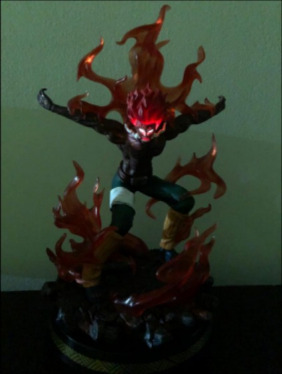

Porém, se tentarmos melhorar o contraste o resultado é o seguinte, que contém uma distorção de ruído:

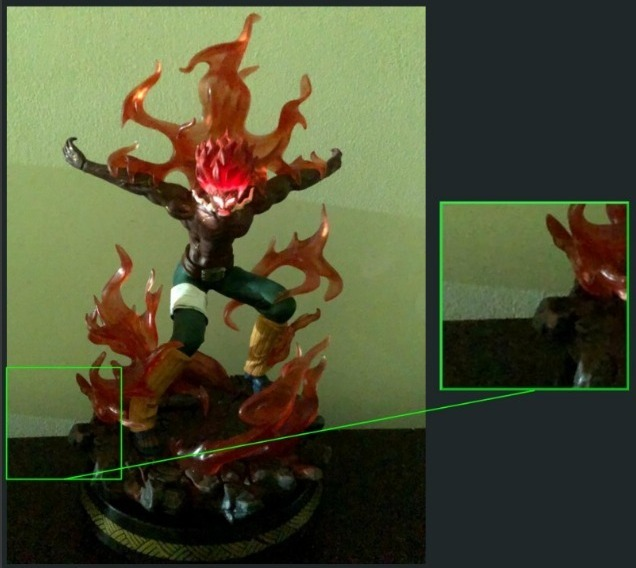

**De onde vem todo esse ruido?**

A resposta é que o ruído vem do sensor. O dispositivo que tenta determinar quando a luz o atinge e quão intensa é essa luz.

No entanto, com pouca luz, ele precisa aumentar bastante sua sensibilidade para registrar qualquer coisa, e essa alta sensibilidade significa que ele também começa a detectar falsos positivos. (Fótons que simplesmente não existem.)

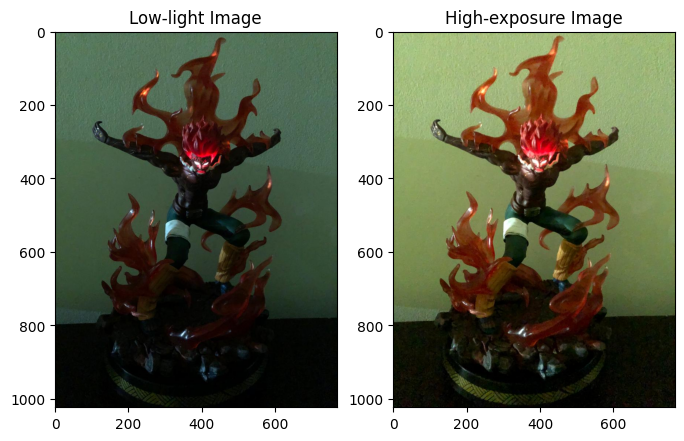

In [ ]:
#Plot the low-light image and the one with high-exposure
fig = plt.figure(figsize=(8,8))
columns = 2
rows = 1

low_light_img = open_rgb_img('iqa_img_storage/iqa/distortions/low-light-photography/exp1/low_light.jpeg')
high_exposure_img = open_rgb_img('iqa_img_storage/iqa/distortions/low-light-photography/exp1/high_exposure.jpeg')

# Save the output
cv2.imwrite('low_light_img.png', cv2.cvtColor(low_light_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('high_exposure_img.png', cv2.cvtColor(high_exposure_img, cv2.COLOR_BGR2RGB))

ax = []
ax.append(fig.add_subplot(rows, columns, 1))
ax[-1].set_title("Low-light Image")
plt.imshow(low_light_img)

ax.append(fig.add_subplot(rows, columns, 2))
ax[-1].set_title("High-exposure Image")
plt.imshow(high_exposure_img)

plt.show()

Sabendo que o sinal permanecerá o mesmo (mesma cena e assumimos que é estático) enquanto o ruído será completamente aleatório. Isso significa que, se tirarmos muitas fotos da cena, elas terão versões diferentes do ruído, mas as mesmas informações úteis. Assim, podemos superar o problema do ruído com esta técnica.

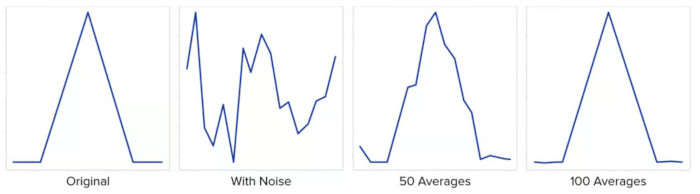

Mais fotos geralmente significam melhor qualidade, mas o número exato depende da situação: quanta luz existe, quão sensível é a câmera, etc. Um bom alcance pode estar entre 10 e 100.

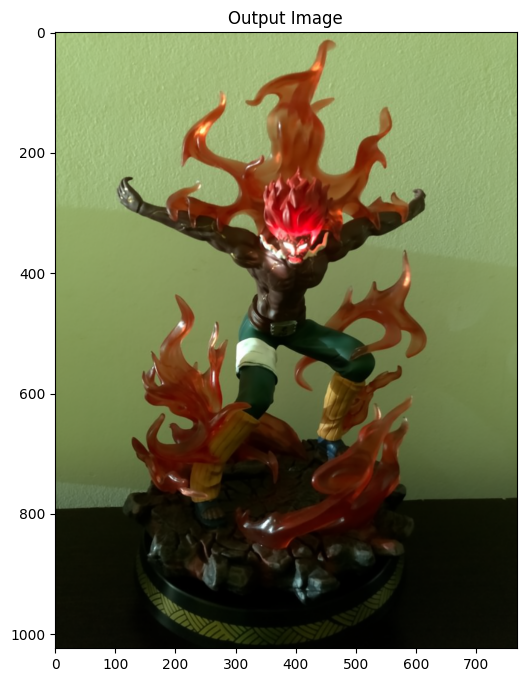

In [ ]:
import os
import numpy as np
import cv2

folder = 'iqa_img_storage/iqa/distortions/low-light-photography/exp1/multiple_high_exposure'

# We get all the image files from the source folder
files = list([os.path.join(folder, f) for f in os.listdir(folder)])

# We compute the average by adding up the images
# Start from an explicitly set as floating point, in order to force the
# conversion of the 8-bit values from the images, which would otherwise overflow

average = open_rgb_img(files[0]).astype(np.float32)

for file in files[1:]:
    image = open_rgb_img(file)
    # NumPy adds two images element wise, so pixel by pixel / channel by channel
    average += image

# Divide by count (again each pixel/channel is divided)
average /= len(files)

# Normalize the image, to spread the pixel intensities across 0..255
# This will brighten the image without losing information
output = cv2.normalize(average, None, 0, 255, cv2.NORM_MINMAX)

# Save the image output
cv2.imwrite('output_noise.png', cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

# Convert to int32 type to plot
result = np.array(output,np.int32)
# Plot all the images
fig = plt.figure(figsize=(8,8))
columns = 1
rows = 1

ax = []
ax.append(fig.add_subplot(rows, columns, 1))
ax[-1].set_title("Output Image")
plt.imshow(result)

plt.show()

# Dark frame subtraction

Para evitar pixels defeituosos do sensor que podem ser excessivamente sensíveis ou insensíveis à luz, como o pixel branco, aplicamos a subtração de quadro escuro **(Dark frame subtraction)**.

In [ ]:
folder_noise = 'iqa_img_storage/iqa/distortions/low-light-photography/noise1'

# We get all the image files from the source folder
noise_files = list([os.path.join(folder_noise, f) for f in os.listdir(folder_noise)])

average_noise = open_rgb_img(noise_files[0]).astype(np.float32)

for noise_file in noise_files[1:]:
    noise_image = open_rgb_img(noise_file)
    # NumPy adds two images element wise, so pixel by pixel / channel by channel
    average_noise += noise_image

# Divide by count (again each pixel/channel is divided)
average_noise /= len(noise_files)

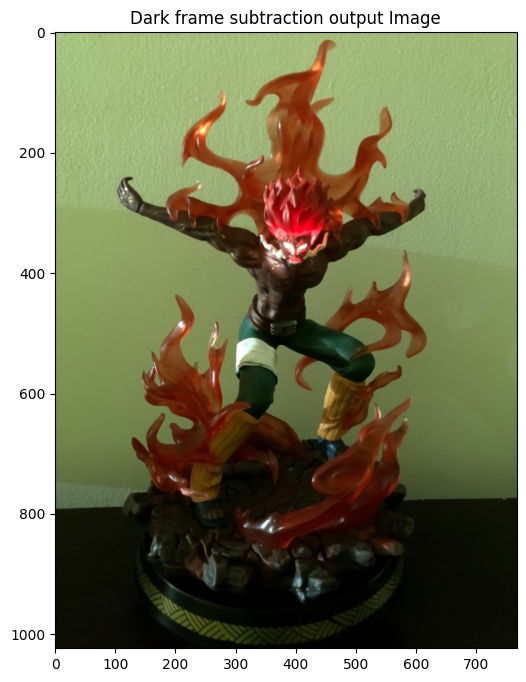

In [ ]:
folder = 'iqa_img_storage/iqa/distortions/low-light-photography/exp1/multiple_high_exposure'

# We get all the image files from the source folder
files = list([os.path.join(folder, f) for f in os.listdir(folder)])

# We compute the average by adding up the images
# Start from an explicitly set as floating point, in order to force the
# conversion of the 8-bit values from the images, which would otherwise overflow

average = open_rgb_img(files[0]).astype(np.float32)

for file in files[1:]:
    image = open_rgb_img(file)
    # NumPy adds two images element wise, so pixel by pixel / channel by channel
    average += image

# Divide by count (again each pixel/channel is divided)
average /= len(files)

# Subtract it form the source average, before normalizing
average -= average_noise

# Normalize the image, to spread the pixel intensities across 0..255
# This will brighten the image without losing information
output = cv2.normalize(average, None, 0, 255, cv2.NORM_MINMAX)
# Save the image output
cv2.imwrite('result_dark_frame_substraction.png', cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

# Convert ot int32 type to plot
result = np.array(output,np.int32)
# Plot all the images
fig = plt.figure(figsize=(8,8))
columns = 1
rows = 1

ax = []
ax.append(fig.add_subplot(rows, columns, 1))
ax[-1].set_title("Dark frame subtraction output Image")
plt.imshow(result)

plt.show()

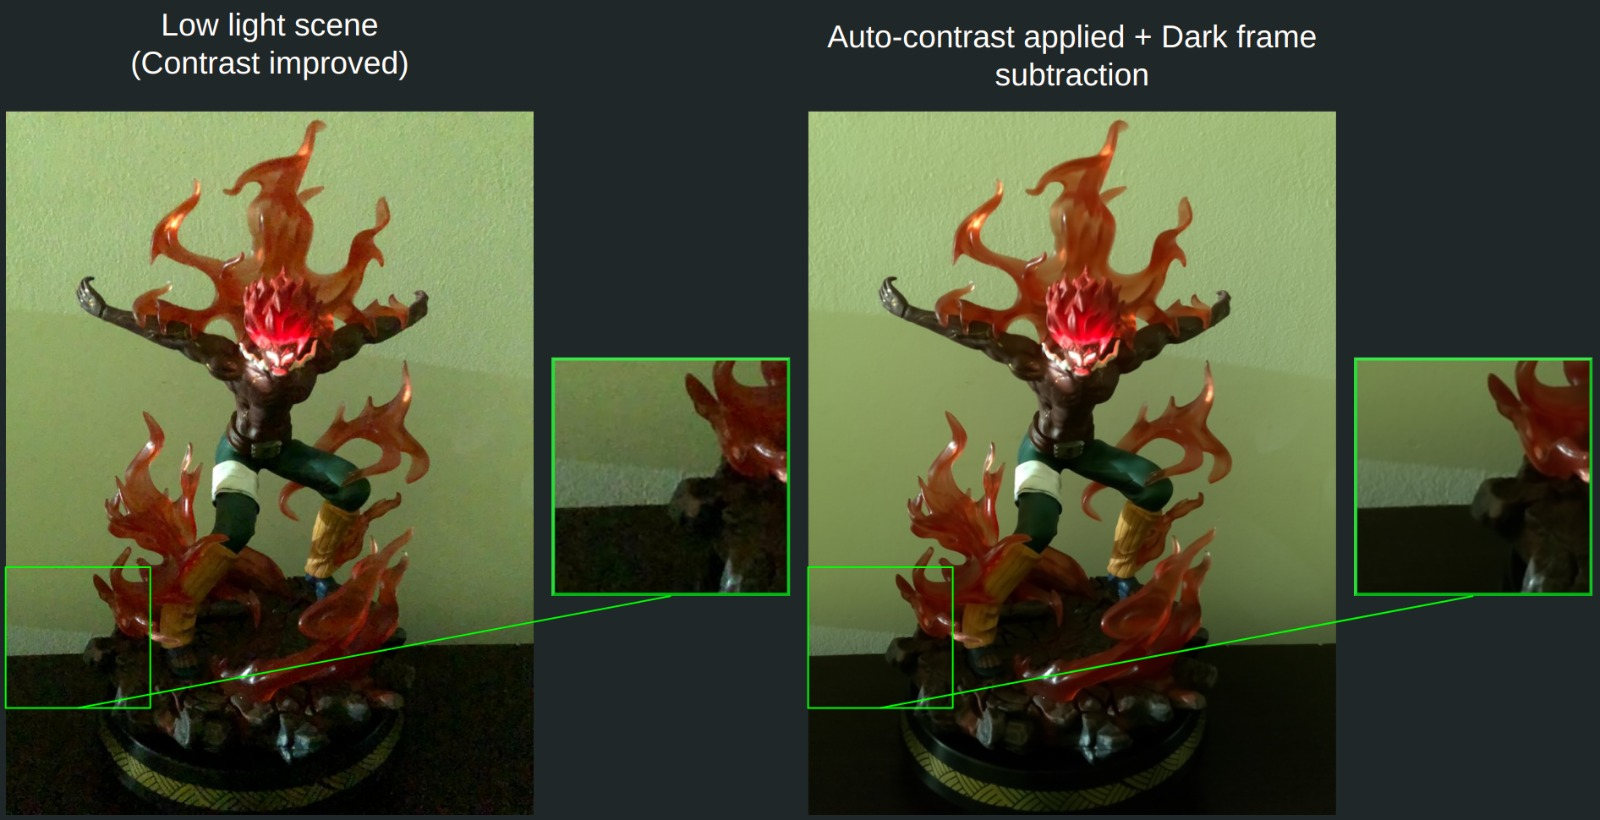

**References**
    
*   Intro to Python Image Processing in Computational Photography

    https://www.toptal.com/opencv/python-image-processing-in-computational-photography


